## Imports

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell


pd.options.display.max_rows = 999
InteractiveShell.ast_node_interactivity = "all"

In [58]:
# Read in data 
data = pd.read_csv('chess_data.csv')
data.shape
data.tail()

(107743, 6)

,player1,player1_elo,player2,player2_elo,winner,game_id
107738,rg370dx,1274,kingsalley,1308,kingsalley,4052426056
107739,tyr124,1307,wasteyouryouth,1213,tyr124,2761996130
107740,MASTER1232L,1131,vishy_inspire_10,1124,vishy_inspire_10,2751584485
107741,cathy_cathy,1315,anon1127,1107,cathy_cathy,145218848
107742,gfendlich,787,shahmatil_tvoyu_mamk,799,shahmatil_tvoyu_mamk,1850793370


## Feature Engineer

In [59]:
# Feature Functions
def is_win(row):
    if row['player1'] == row['winner']:
        return 1
    elif row['player2'] == row['winner']:
        return 0
    else: 
        return 999 # one faulty row in the scrape 

def elo_diff(row):
    return row['player1_elo'] - row['player2_elo']

# Apply functions  
data['win'] = data.apply(is_win, axis=1)
data['elo_diff'] = data.apply(elo_diff, axis=1)

In [60]:
# Drop duplicates and remove drawn games 
print('Before dedup: ' + str(data.shape[0]) + ' rows')
data.drop_duplicates(subset ="game_id", keep = False, inplace = True) 
data = data[data.winner != 'Game']
data = data[data.win != 999] 
print('After dedup: ' + str(data.shape[0]) + ' rows')

Before dedup: 107743 rows
After dedup: 104420 rows


In [61]:
data.describe()

,player1_elo,player2_elo,game_id,win,elo_diff
count,104420.000000,104420.000000,1.044200e+05,104420.000000,104420.000000
mean,1269.302442,1268.685894,1.975303e+09,0.518742,0.616549
std,341.210943,340.753983,1.245543e+09,0.499651,128.139574
min,100.000000,118.000000,1.000000e+00,0.000000,-1800.000000
25%,1037.000000,1035.000000,8.894791e+08,0.000000,-46.000000
50%,1267.000000,1267.000000,1.994236e+09,1.000000,1.000000
75%,1495.000000,1494.000000,3.060839e+09,1.000000,48.000000
max,2886.000000,3000.000000,4.107982e+09,1.000000,2216.000000


Text(0.5,0,'Elo Difference')

Text(0,0.5,'Frequency')

Text(0.5,1,'Distribution of Elo Differences')

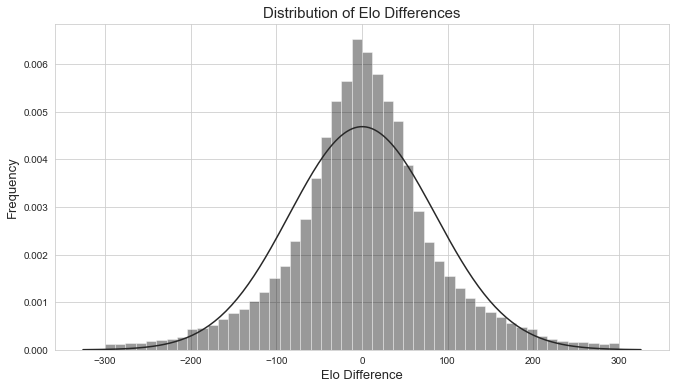

In [66]:
trunc300 = data.loc[data['elo_diff'].between(-300, 300)]

sns.set_style("whitegrid")
plt.figure(figsize=(11, 6))

sns.distplot(trunc300['elo_diff'], 
             kde=False, 
             fit=stats.gamma,
             color='black')

plt.xlabel('Elo Difference', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Elo Differences', fontsize=15)

plt.show()

Text(0.5,0,'Elo Difference')

Text(0,0.5,'Percent of Games Won')

Text(0.5,1,'Win Percentages by Elo Difference')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

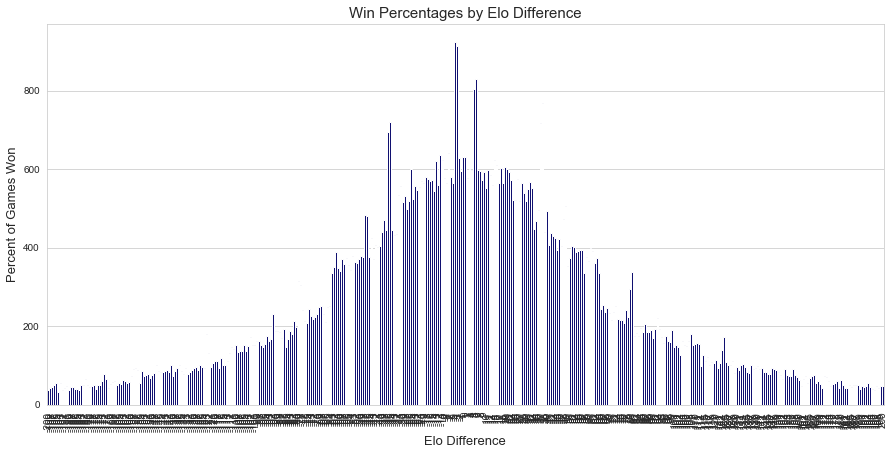

In [53]:
elorange = 200

data100 = data.loc[data['elo_diff'].between(-elorange, elorange)]
grouped100 = data100.groupby('elo_diff').count()

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

sns.barplot(y= 'win', 
            x=grouped100.index,
            data=grouped100,
            color='navy'
           )

plt.xlabel('Elo Difference', fontsize=13)
plt.ylabel('Percent of Games Won', fontsize=13)
plt.title('Win Percentages by Elo Difference', fontsize=15)
plt.xticks(rotation=90)

plt.show()

# computer matches?

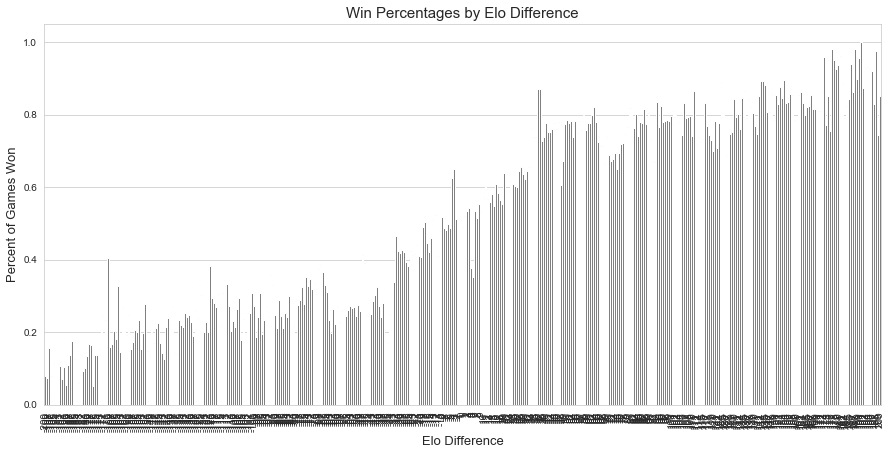

In [20]:
elorange = 200

data_trunc = data.loc[data['elo_diff'].between(-elorange, elorange)]
grouped_trunc = data_trunc.groupby('elo_diff').mean()

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

sns.barplot(y= 'win', 
            x=grouped_trunc.index,
            data=grouped_trunc,
            color='gray'
           )

plt.xlabel('Elo Difference', fontsize=13)
plt.ylabel('Percent of Games Won', fontsize=13)
plt.title('Win Percentages by Elo Difference', fontsize=15)
plt.xticks(rotation=90)

plt.show()

In [16]:
elo_trunc = data.loc[data['player1_elo'].between(0, 2886)]
grouped_elo = elo_trunc.groupby('player1_elo').count()
grouped_elo

,player1,player2,player2_elo,winner,game_id,win,elo_diff
player1_elo,,,,,,,
100,1,1,1,1,1,1,1
134,1,1,1,1,1,1,1
139,1,1,1,1,1,1,1
140,1,1,1,1,1,1,1
146,1,1,1,1,1,1,1
147,1,1,1,1,1,1,1
149,1,1,1,1,1,1,1
154,1,1,1,1,1,1,1
158,1,1,1,1,1,1,1


## Logistic regression model

In [22]:
# Separate independent and dependent variables
X = data['elo_diff']
y = data['win']

# Fit the model
model = sm.Logit(y, X)

# Print the results
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.610617
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.118      
Dependent Variable: win              AIC:              118506.7975
Date:               2019-10-13 11:05 BIC:              118516.2804
No. Observations:   97037            Log-Likelihood:   -59252.    
Df Model:           0                LL-Null:          -67183.    
Df Residuals:       97036            LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
             Coef.    Std.Err.      z       P>|z|    [0.025   0.975]
--------------------------------------------------------------------
elo_diff     0.0129     0.0001   110.8245   0.0000   0.0127   0.0131



In [32]:
# Fit model on training data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_train.reshape(-1, 1)
y_test = y_train.reshape(-1, 1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



Accuracy of logistic regression classifier on test set: 0.68


/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
/Users/Eric/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Eric/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20799 11918]
 [ 9729 25479]]


In [34]:
# Recall Percision Accuracy 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66     32717
           1       0.68      0.72      0.70     35208

    accuracy                           0.68     67925
   macro avg       0.68      0.68      0.68     67925
weighted avg       0.68      0.68      0.68     67925



(-0.002, 1.0)

(0.0, 1.002)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

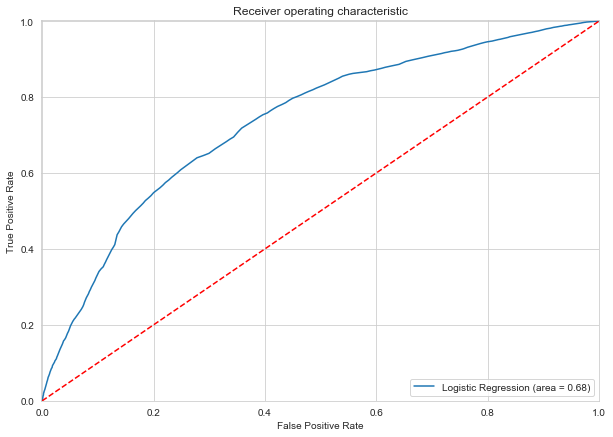

In [76]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.002, 1.0])
plt.ylim([0.0, 1.002])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()